In [92]:
# Import Required Libraries
import pandas as pd
import math
import numpy as np

# ---------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import pylab 
plt.rcParams['figure.figsize']=(17,5)

# ---------------------------------------
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import iplot

# ---------------------------------------
from prophet import Prophet
import holidays
from sklearn.metrics import mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings("ignore")

In [93]:
# Functions 
def line_plot(df, date, AEP, text, y_tiltle, x_title):
    data = go.Scatter(x = df[date],
                      y = df[AEP],
                      mode = 'lines',
                      name = AEP)

    layout = go.Layout(title={'text': text,
                              'y':0.9,
                              'x':0.5,
                              'xanchor': 'center',
                              'yanchor': 'top'},
                       xaxis = dict(title = x_title),
                       yaxis = dict(title = y_tiltle),
                       template = 'plotly_dark')

    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
# ---------------------------------------
def new_df(df, col, new_date, new_AEP, split):
    tmp_df = df[[col]].reset_index().rename(columns={'Datetime':new_date, 'Entry':new_AEP})
    tmp_df = pd.DataFrame(tmp_df.resample(split, on='Datetime', origin = 'start').mean())
    tmp_df.reset_index(inplace=True)
    return tmp_df

# ---------------------------------------
def bar_plot(col1, col2, agg_func, title, xtitle, ytitle):
    data = go.Bar(x = df.groupby(col1).agg({col2: agg_func}). \
              reset_index()[col1],
              y = df.groupby(col1).agg({col2: agg_func}). \
              reset_index()[col2],
              text =round(df.groupby(col1).agg({col2: agg_func}).reset_index()[col2],2),
              textposition= 'outside')

    layout = go.Layout(title={'text': title,
                              'y':0.9,
                              'x':0.5,
                              'xanchor': 'center',
                              'yanchor': 'top'},
                       xaxis = dict(title = xtitle),
                       yaxis = dict(title = ytitle),
                       template = 'plotly_dark')

    fig = go.Figure(data = data, layout = layout)
    iplot(fig)


# ---------------------------------------
def box_plot(q_num, col1, col2, color, title, xtitle, ytitle):
    box = go.Box(x = df.loc[df['quarter']==q_num][col1],
                       y = df.loc[df['quarter']==q_num][col2],
                       name = col1, 
                       marker_color= color)

    layout = go.Layout(title={'text': title,
                              'y':0.9,
                              'x':0.5,
                              'xanchor': 'center',
                              'yanchor': 'top'},
                       xaxis = dict(title = xtitle),
                       yaxis = dict(title = ytitle),
                       template = 'plotly_dark')


    fig = go.Figure(data = box, layout = layout)
    iplot(fig)


# ---------------------------------------
def MAPE(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)

In [94]:
df = pd.read_csv('data/00_MRT_2023_Prophet.csv', index_col=[0], parse_dates=[0])
df = df.drop('Exit', axis=1)

df.head


<bound method NDFrame.head of                      Entry
Datetime                  
2023-01-01 03:00:00      0
2023-01-01 04:00:00      0
2023-01-01 05:00:00      0
2023-01-01 06:00:00    956
2023-01-01 07:00:00   1076
...                    ...
2023-12-31 19:00:00   1681
2023-12-31 20:00:00    297
2023-12-31 21:00:00      0
2023-12-31 22:00:00      0
2023-12-31 23:00:00      0

[8757 rows x 1 columns]>

In [95]:
df['date'] = df.index
df['hour'] = df['date'].dt.hour
df['day_of_week'] = df['date'].dt.dayofweek
df['weekday_name'] = df['date'].dt.day_name()
df['quarter'] = df['date'].dt.quarter
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df['day_of_year'] = df['date'].dt.dayofyear
df['day_of_month'] = df['date'].dt.day
df['week_of_year'] = df['date'].dt.day_name()

df.head()

,Entry,date,hour,day_of_week,weekday_name,quarter,month,year,day_of_year,day_of_month,week_of_year
Datetime,,,,,,,,,,,
2023-01-01 03:00:00,0,2023-01-01 03:00:00,3,6,Sunday,1,1,2023,1,1,Sunday
2023-01-01 04:00:00,0,2023-01-01 04:00:00,4,6,Sunday,1,1,2023,1,1,Sunday
2023-01-01 05:00:00,0,2023-01-01 05:00:00,5,6,Sunday,1,1,2023,1,1,Sunday
2023-01-01 06:00:00,956,2023-01-01 06:00:00,6,6,Sunday,1,1,2023,1,1,Sunday
2023-01-01 07:00:00,1076,2023-01-01 07:00:00,7,6,Sunday,1,1,2023,1,1,Sunday


In [96]:
line_plot(df, 'date', 'Entry', 'MRT-3 Taft Station Ridership - Hourly', 'Entry', 'Year')

In [97]:
df_daily = new_df(df, 'Entry', 'Datetime', 'Entry_daily', 'D')
df_daily.head()

,Datetime,Entry_daily
0,2023-01-01 03:00:00,1261.000000
1,2023-01-02 03:00:00,1581.333333
2,2023-01-03 03:00:00,1922.250000
3,2023-01-04 03:00:00,2032.958333
4,2023-01-05 03:00:00,1788.125000


In [98]:
line_plot(df_daily, 'Datetime', 'Entry_daily', 'MRT-3 Taft Ridership - Daily', 'Entry_daily', 'Year')

In [99]:
df_monthly = new_df(df, 'Entry', 'Datetime', 'Entry_monthly', 'M')
df_monthly.head()

,Datetime,Entry_monthly
0,2023-01-31,1979.647773
1,2023-02-28,2093.635417
2,2023-03-31,2050.873656
3,2023-04-30,1724.459722
4,2023-05-31,2043.501344


In [100]:
line_plot(df_monthly, 'Datetime', 'Entry_monthly', 'MRT-3 Taft Ridership - Monthly', 'Entry_monthly', 'Year')

In [101]:
fig = px.line(df, x='date', y='Entry', 
              title='MRT-3 Taft Ridership with Range Slider and Selectors', 
             )

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [102]:
df_new = df[['Entry']].reset_index().rename(columns={'Datetime':'ds', 'Entry':'y'})
df_new.head()

,ds,y
0,2023-01-01 03:00:00,0
1,2023-01-01 04:00:00,0
2,2023-01-01 05:00:00,0
3,2023-01-01 06:00:00,956
4,2023-01-01 07:00:00,1076


In [103]:
train_len = math.floor((df_new.shape[0]*90)/100)
train_len

7881

In [104]:
train = df_new[:train_len]
test = df_new[train_len:]

In [105]:
train_samples = go.Scatter(x = train['ds'],
                  y = train['y'],
                  mode = 'lines',
                  name = 'Train')

test_samples = go.Scatter(x = test['ds'],
                  y = test['y'],
                  mode = 'lines',
                  name = 'Test')

layout = go.Layout(title={'text': 'Train/test split',
                          'y':0.9,
                          'x':0.5,
                          'xanchor': 'center',
                          'yanchor': 'top'},
                   xaxis = dict(title = 'Year'),
                   yaxis = dict(title = 'Entry'),
                   template = 'plotly_dark')

data = [train_samples, test_samples]
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [106]:
prophet_model = Prophet()
prophet_model.fit(train)

11:20:05 - cmdstanpy - INFO - Chain [1] start processing
11:20:07 - cmdstanpy - INFO - Chain [1] done processing


In [107]:
test_forecast = prophet_model.predict(test)
test_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2023-11-25 12:00:00,2406.708891,1625.352853,3226.887413
1,2023-11-25 13:00:00,2496.336429,1742.904977,3264.020575
2,2023-11-25 14:00:00,2429.388236,1690.591430,3230.883816
3,2023-11-25 15:00:00,2379.384403,1621.089549,3112.340573
4,2023-11-25 16:00:00,2589.792682,1809.542007,3349.715437


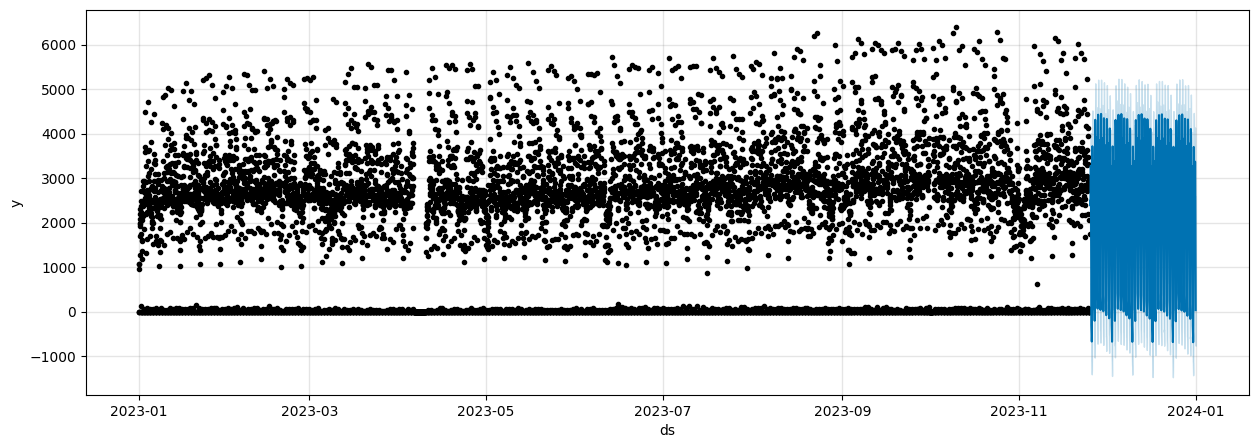

In [108]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = prophet_model.plot(test_forecast,ax=ax)
plt.show()

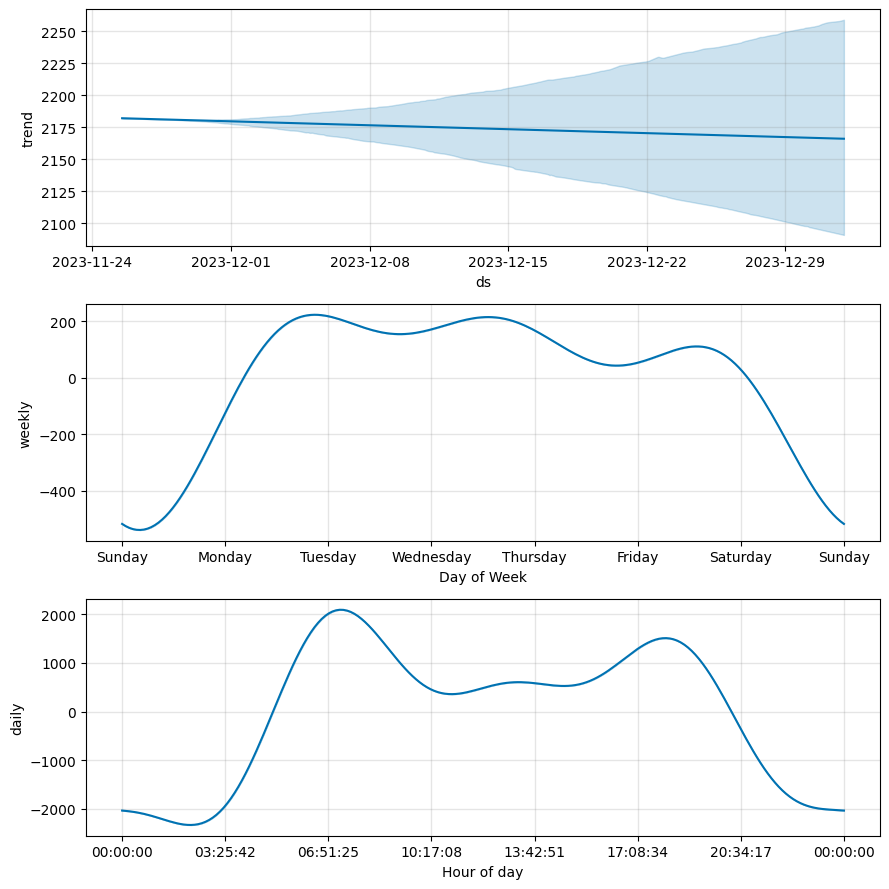

In [109]:
prophet_model.plot_components(test_forecast)
plt.show()

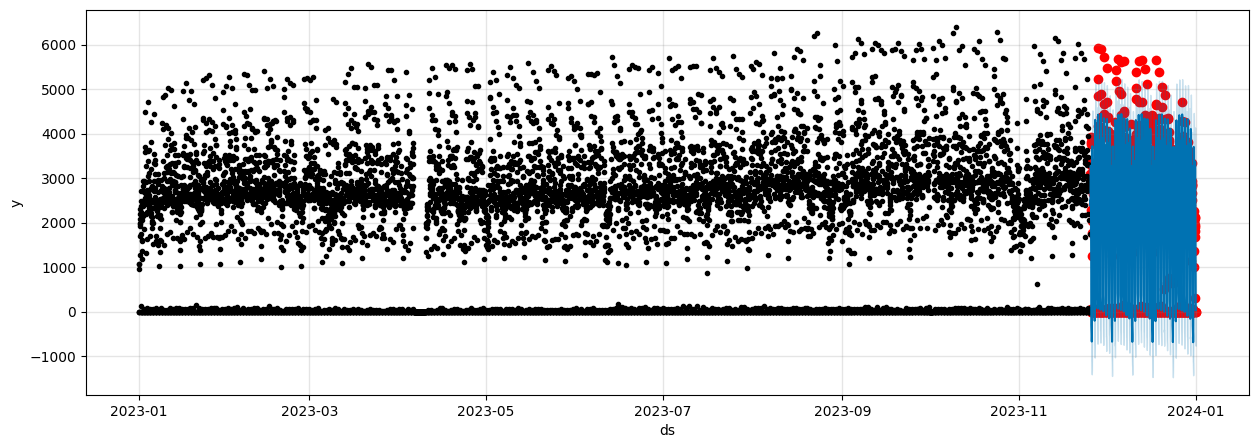

In [110]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test.ds, test['y'], color='r')
fig = prophet_model.plot(test_forecast, ax=ax)

In [111]:
future = prophet_model.make_future_dataframe(periods=100, freq='D')
forecast_future = prophet_model.predict(future)
forecast_future[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2023-01-01 03:00:00,-894.180921,-1660.651918,-145.870722
1,2023-01-01 04:00:00,-103.926139,-927.039469,709.569544
2,2023-01-01 05:00:00,1269.500518,520.079351,2072.757144
3,2023-01-01 06:00:00,2648.927844,1850.380547,3368.713795
4,2023-01-01 07:00:00,3370.853338,2604.969423,4135.319490


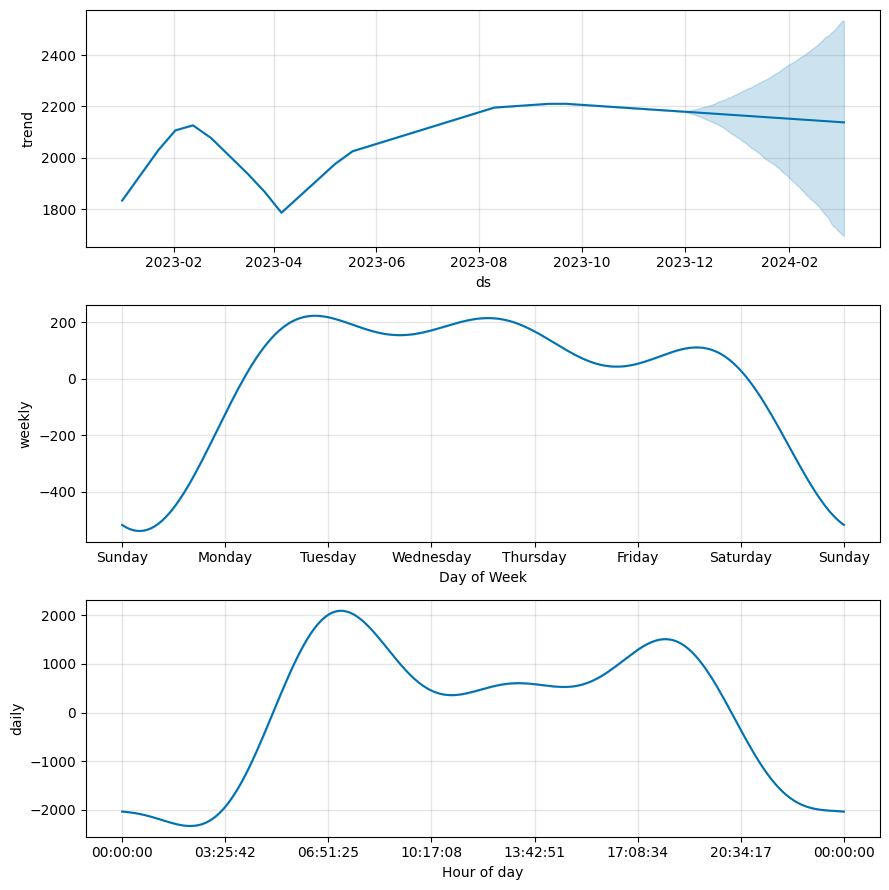

In [112]:
prophet_model.plot_components(forecast_future)
plt.show()

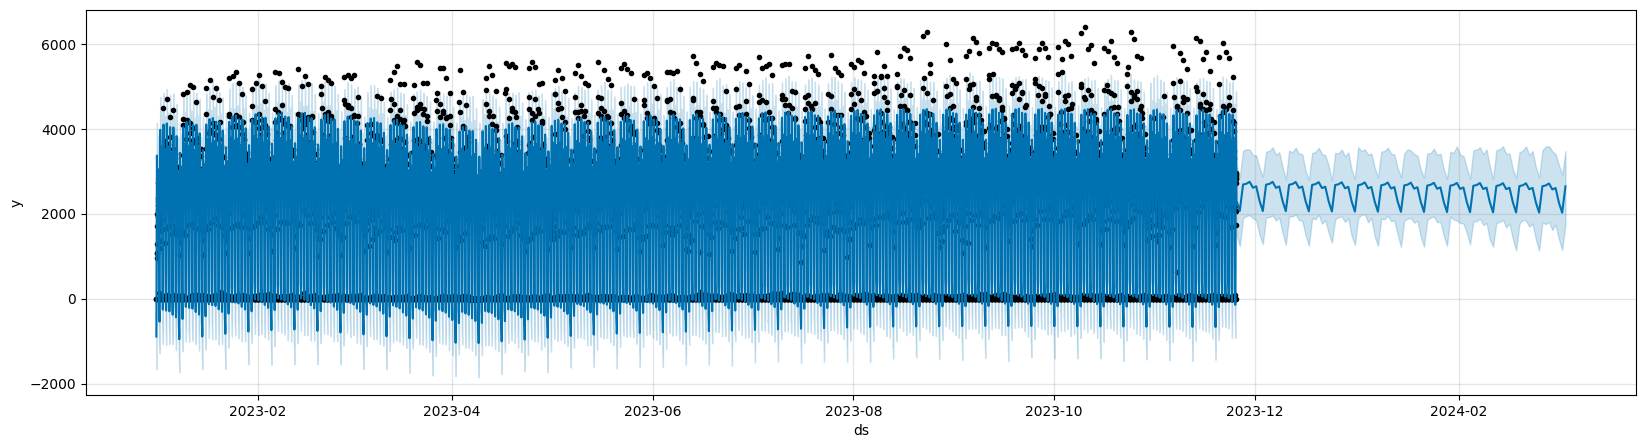

In [113]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(20)
fig = prophet_model.plot(forecast_future,ax=ax)
plt.show()

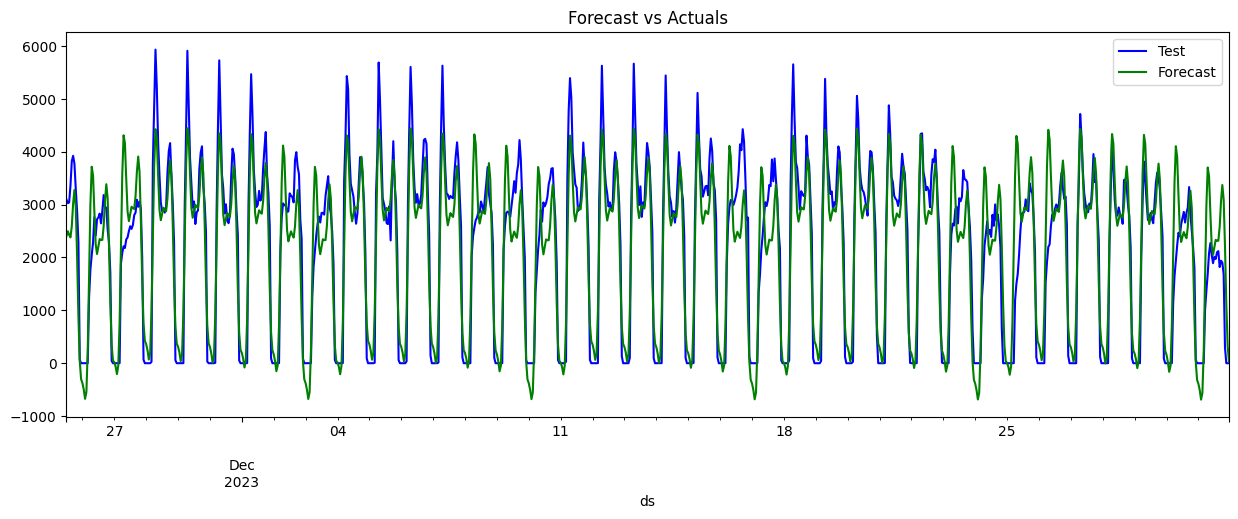

In [114]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
test.plot(kind='line',x='ds', y='y', color='blue', label='Test', ax=ax)
test_forecast.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [129]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_model, initial='6480 hours', horizon = '720 hours')


  0%|          | 0/2 [00:00<?, ?it/s]11:26:28 - cmdstanpy - INFO - Chain [1] start processing
11:26:29 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:01<00:01,  1.63s/it]11:26:30 - cmdstanpy - INFO - Chain [1] start processing
11:26:31 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:03<00:00,  1.92s/it]


In [130]:
df_cv.head()


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-10-11 12:00:00,2955.081697,2204.609878,3686.706955,3068,2023-10-11 11:00:00
1,2023-10-11 13:00:00,3078.135452,2239.880787,3846.587862,2530,2023-10-11 11:00:00
2,2023-10-11 14:00:00,3041.347399,2253.672829,3782.326481,2618,2023-10-11 11:00:00
3,2023-10-11 15:00:00,3016.188835,2256.733786,3749.290758,2914,2023-10-11 11:00:00
4,2023-10-11 16:00:00,3246.055911,2456.037412,4022.648666,3258,2023-10-11 11:00:00


In [131]:
from prophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days 00:00:00,281946.173111,530.986039,410.290141,0.180538,0.662177,0.854167
1,3 days 01:00:00,285813.276661,534.615073,416.774962,0.182873,0.664660,0.854167
2,3 days 02:00:00,284524.129110,533.408032,415.395468,0.180538,0.664244,0.854167
3,3 days 03:00:00,284337.997643,533.233530,414.428802,0.180538,0.663963,0.854167
4,3 days 04:00:00,291683.143643,540.076979,421.873577,0.182873,0.666592,0.847222


In [132]:
holiday = pd.DataFrame([])
for date, name in sorted(holidays.Philippines(years=[2023]).items()):
    #holiday = holiday.append(pd.DataFrame({'ds': date, 'holiday': "US-Holidays"}, index=[0]), ignore_index=True)
    holiday = pd.concat([holiday, pd.DataFrame({'ds': date, 'holiday': "PH-Holidays"}, index=[0])], ignore_index=True)
holiday['ds'] = pd.to_datetime(holiday['ds'], format='%Y-%m-%d', errors='ignore')

In [119]:
holiday.head()

,ds,holiday
0,2023-01-01,PH-Holidays
1,2023-01-22,PH-Holidays
2,2023-02-25,PH-Holidays
3,2023-04-06,PH-Holidays
4,2023-04-07,PH-Holidays


In [120]:
prophet_model_with_holidays = Prophet(holidays=holiday)
prophet_model_with_holidays.fit(train)

11:20:25 - cmdstanpy - INFO - Chain [1] start processing
11:20:26 - cmdstanpy - INFO - Chain [1] done processing


In [121]:
future = prophet_model_with_holidays.make_future_dataframe(periods=100, freq='D')
forecast = prophet_model_with_holidays.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
7976,2024-02-29 11:00:00,2557.370015,1760.117524,3283.915683
7977,2024-03-01 11:00:00,2605.538198,1815.358671,3298.693890
7978,2024-03-02 11:00:00,2268.047790,1524.634981,3043.236763
7979,2024-03-03 11:00:00,2041.225089,1274.954777,2852.301119
7980,2024-03-04 11:00:00,2680.243650,1876.351786,3470.471422


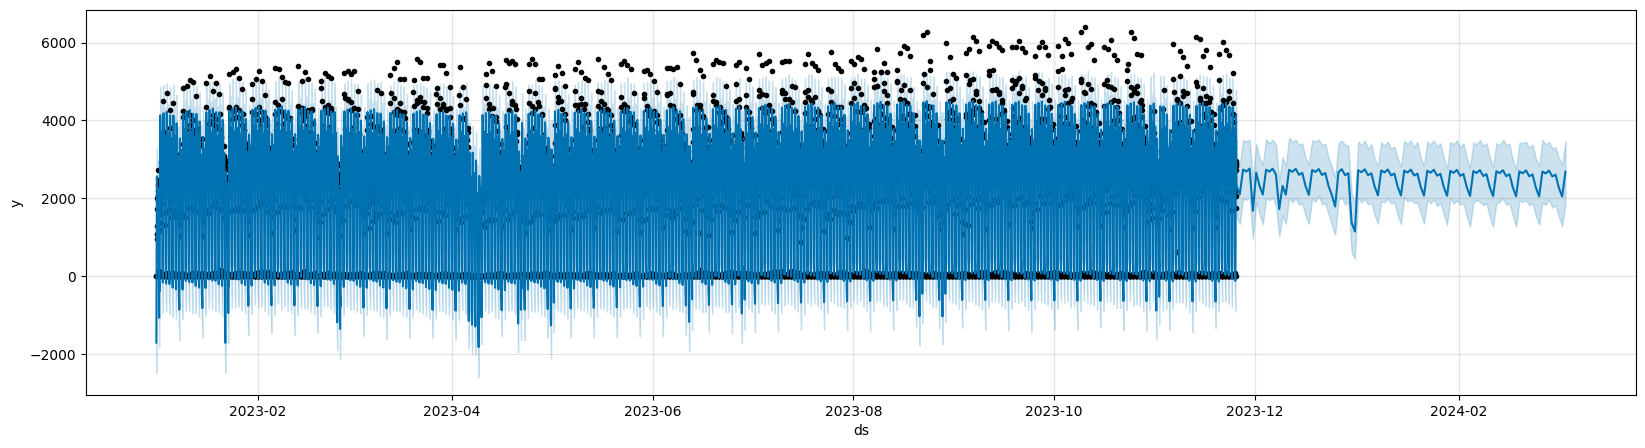

In [122]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(20)
fig = prophet_model_with_holidays.plot(forecast,ax=ax)
plt.show()

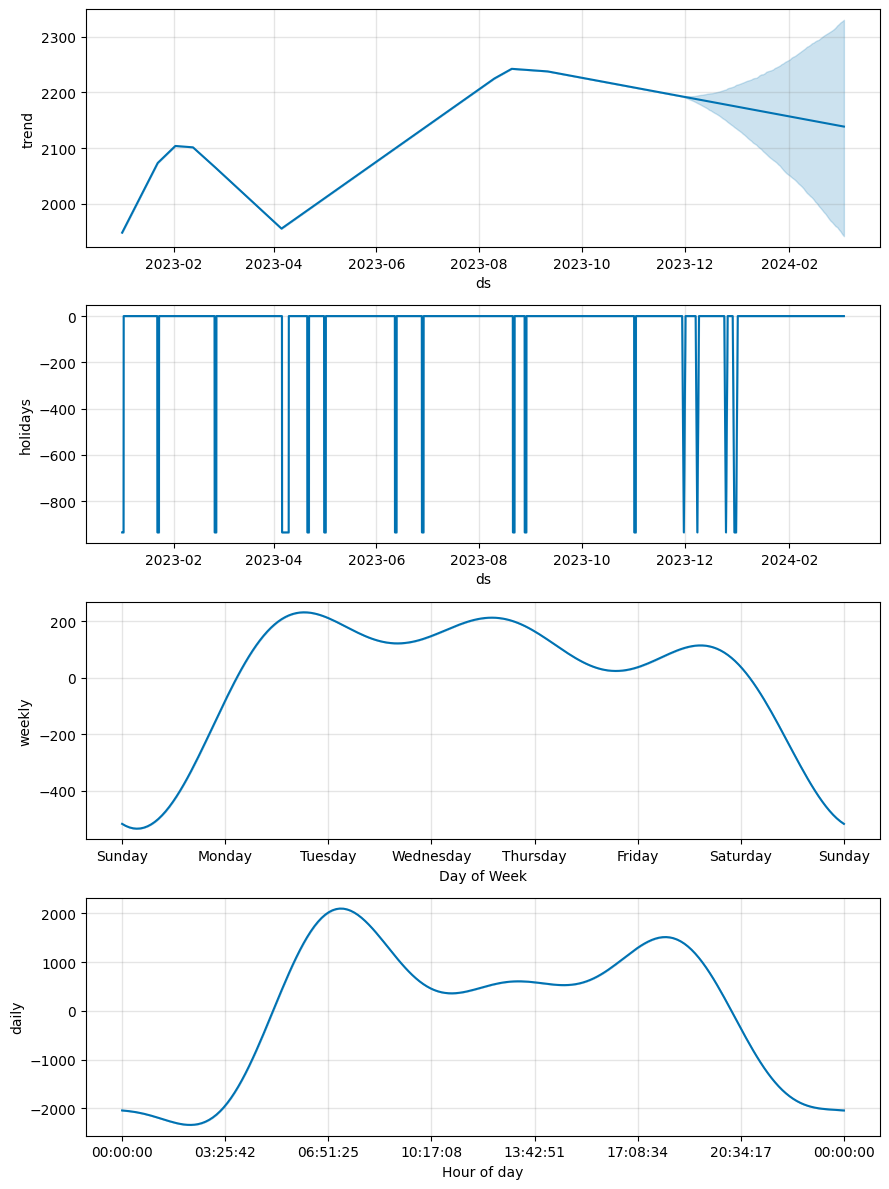

In [123]:
fig = prophet_model_with_holidays.plot_components(forecast)

In [124]:
test_forecast_holiday = prophet_model_with_holidays.predict(test)
test_forecast_holiday[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
871,2023-12-31 19:00:00,2210.124557,1462.245919,2910.815658
872,2023-12-31 20:00:00,1324.894735,576.994327,2080.518205
873,2023-12-31 21:00:00,232.549977,-504.835165,949.950637
874,2023-12-31 22:00:00,-555.715797,-1294.306549,140.128451
875,2023-12-31 23:00:00,-851.837642,-1621.105213,-104.327307


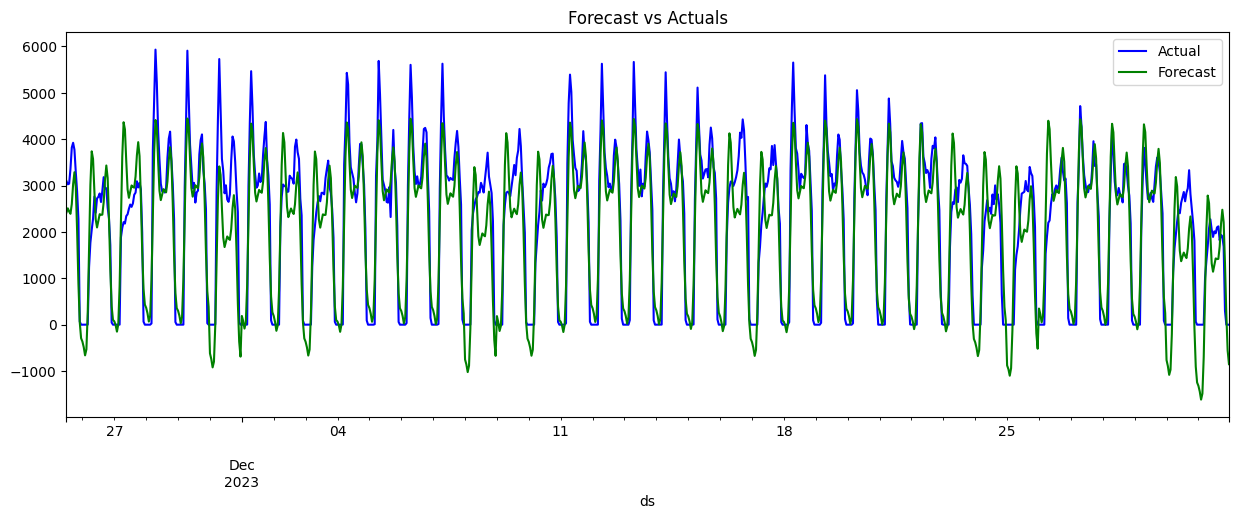

In [125]:
f, ax = plt.subplots(figsize=(14,5))
f.set_figheight(5)
f.set_figwidth(15)
test.plot(kind='line',x='ds', y='y', color='blue', label='Actual', ax=ax)
test_forecast_holiday.plot(kind='line',x='ds',y='yhat', color='green',label='Forecast', ax=ax)
plt.title('Forecast vs Actuals')
plt.show()

In [133]:
df_cv = cross_validation(prophet_model_with_holidays, initial='6480 hours', horizon = '720 hours')

  0%|          | 0/2 [00:00<?, ?it/s]

11:27:18 - cmdstanpy - INFO - Chain [1] start processing
11:27:19 - cmdstanpy - INFO - Chain [1] done processing
 50%|█████     | 1/2 [00:01<00:01,  1.46s/it]11:27:20 - cmdstanpy - INFO - Chain [1] start processing
11:27:20 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 2/2 [00:02<00:00,  1.32s/it]


In [134]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-10-11 12:00:00,2929.251132,2191.476669,3710.485080,3068,2023-10-11 11:00:00
1,2023-10-11 13:00:00,3053.298910,2332.153749,3787.745723,2530,2023-10-11 11:00:00
2,2023-10-11 14:00:00,3017.712631,2302.252697,3771.726025,2618,2023-10-11 11:00:00
3,2023-10-11 15:00:00,2993.775595,2295.938371,3728.433640,2914,2023-10-11 11:00:00
4,2023-10-11 16:00:00,3224.543303,2454.065863,3964.912951,3258,2023-10-11 11:00:00


In [135]:
df_p = performance_metrics(df_cv)
df_p.head()

,horizon,mse,rmse,mae,mdape,smape,coverage
0,3 days 00:00:00,283112.533927,532.083202,411.099115,0.182063,0.662518,0.847222
1,3 days 01:00:00,286889.618269,535.620778,417.261563,0.186421,0.664884,0.847222
2,3 days 02:00:00,285820.954425,534.622254,416.169783,0.182063,0.664557,0.847222
3,3 days 03:00:00,285868.862011,534.667057,415.468750,0.182063,0.664359,0.847222
4,3 days 04:00:00,293275.934557,541.549568,423.153195,0.186421,0.667064,0.840278
